# Problem Set 2

Run this cell to set up plotting:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

We will investigate the properties of two different filters (impulse response functions):

\begin{align}
k_1(t) & = \begin{cases}
0 & \mbox{if } t < 0 \\
\frac{t}{\tau_1^2} e^{(-t/\tau_1)} & \mbox{if } t \geq 0 \end{cases} \\
k_2(t) & = \begin{cases}
0 & \mbox{if } t < 0 \\
\frac{t}{\tau_1^2} e^{(-t/\tau_1)} - \frac{t}{\tau_2^2} e^{(-t/\tau_2)} & \mbox{if } t \geq 0
\end{cases}
\end{align}

For both filters, $\tau_1 = 50$ ms and $\tau_2 = 100$ ms.


**1.** Plot $k_1(t)$ and $k_2(t)$ for $0 < t < 1000$ ms. A bin size of 1 ms is good.

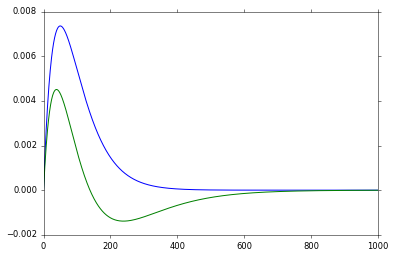

In [4]:
tau_1 = 50
tau_2 = 100
t = np.arange(0,1000,1)
k1 = (t / tau_1**2) * np.exp(-t / tau_1)
k2 = k1 - (t / tau_2**2) * np.exp(-t / tau_2)
plt.plot(t, k1, t, k2)

**2.** Generate three input signals:

\begin{align}
s_1(t) & = \sin(2 \pi \omega_1 t) \\
s_2(t) & = \sin(2 \pi \omega_2 t) \\
s_3(t) & \sim N(0,1)
\end{align}

Let $\omega_1 = 0.3$ Hz and $\omega_2 = 3$ Hz. For $s_3$, $N$ means that the samples are drawn from a normal distribution with mean 0 and standard deviation 1 (hint: use `np.random.randn()`)

Use a bin size of 1 ms and plot about 10 s of data for each signal.

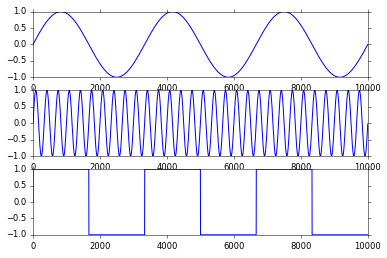

In [10]:
omega_1 = 0.3 # Hz
omega_2 = 3.0 # Hz
t2 = np.arange(0, 10000, 1)
s1 = np.sin(2 * np.pi * omega_1 / 1000 * t2) # note conversion of frequency to kHz to match ms
s2 = np.sin(2 * np.pi * omega_2 / 1000 * t2)
s3 = np.sign(s1)

plt.subplot(311).plot(t2, s1)
plt.subplot(312).plot(t2, s2)
plt.subplot(313).plot(t2, s3)

**3.** For $s_1$ and $s_2$, compute and plot the outputs using filter $k_1(t)$ and then filter $k_2(t)$ (hint: use `np.convolve`)

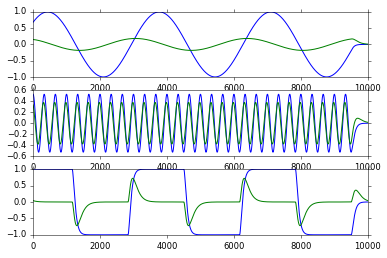

In [12]:
s1k1 = np.convolve(s1, k1, mode="same")  # mode="same" restricts calculation to first 10k points
s1k2 = np.convolve(s1, k2, mode="same")
s2k1 = np.convolve(s2, k1, mode="same")  # mode="same" restricts calculation to first 10k points
s2k2 = np.convolve(s2, k2, mode="same")
s3k1 = np.convolve(s3, k1, mode="same")  # mode="same" restricts calculation to first 10k points
s3k2 = np.convolve(s3, k2, mode="same")
plt.subplot(311).plot(t2, s1k1, t2, s1k2) # note edge effects
plt.subplot(312).plot(t2, s2k1, t2, s2k2)
plt.subplot(313).plot(t2, s3k1, t2, s3k2)

What do you notice about the response amplitudes? What differences do you see between the outputs of the two filters?

*$k_2$ attenuates the low-frequency signal much more than $k_1$. Both filters attenuate the higher-frequency signal about the same amount. This is consistent with $k_1$ being a low-pass filter and $k_2$ being a bandpass filter. For the square wave, $k_1$ smooths the onsets and offsets of the wave but leaves the peaks the same. $k_2$ causes the filtered signal to go back to zero, further indicating that it filters out the low-frequency components of $s_3$*

**4.** Filter $s_3$ with both $k_1$ and $k_2$. Compute the power spectrum of $s_3(t)$, $(s_3 \star k_1)(t)$ and $(s_3 \star k_2)(t)$. Hint: use `np.fft.fft()` to calculate the Fourier transform and `np.abs()` to calculate the modulus of the output.

(0, 50)

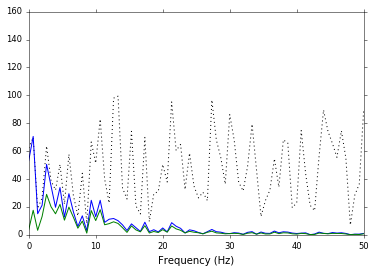

In [13]:
s3 = np.random.randn(3000)
s3k1 = np.convolve(s3, k1, mode="same")
s3k2 = np.convolve(s3, k2, mode="same")

nyq = s3.size / 2  # for real inputs, only use FFT outputs up to Nyquist
S3   = np.fft.fft(s3)[:nyq]
S3K1 = np.fft.fft(s3k1)[:nyq]
S3K2 = np.fft.fft(s3k2)[:nyq]

f = np.linspace(0, 1000, S3K2.size)
plt.plot(f, np.abs(S3), 'k:', f, np.abs(S3K1), 'b', f, np.abs(S3K2), 'g')
plt.xlabel("Frequency (Hz)")
plt.xlim([0, 50]) # zoom in a bit

What do you notice about the spectra? Do they seem noisy? You can get a better estimate of the power spectrum by generating a much longer $s_3(t)$ (say around 1000 s), dividing it into 10 s segments, and averaging the power spectra from each segment.

(0, 50)

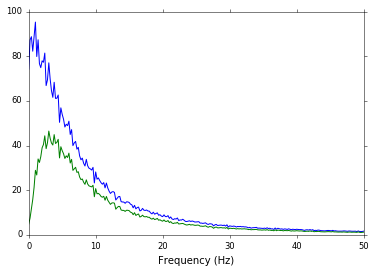

In [14]:
s3 = np.random.randn(1000 * 1000)
s3k1 = np.convolve(s3, k1, mode="same")
s3k2 = np.convolve(s3, k2, mode="same")

def periodogram(x, n=10000):
    Z = np.zeros(n)  # preallocate array
    N = 0
    for i in range(0, x.size, n):
        # nb: if last window is shorter than n, this effectively pads with zeros.
        X = np.fft.fft(x[i:(i+n)], n=n)
        Z += np.abs(X)
        N += 1
    return Z / N
  
S3K1  = periodogram(s3k1)
S3K2  = periodogram(s3k2)
nyq = S3K1.size / 2
f   = np.linspace(0, 1000, nyq)
plt.plot(f, S3K1[:nyq], f, S3K2[:nyq])
plt.xlabel("Frequency (Hz)")
plt.xlim([0, 50])

*The $k_1$-filtered signal has a peak that starts at 0 Hz and falls off gradually. The peak of the $k_2$-filtered signal is around 5 Hz, and there is very little power at low frequencies. The power spectrum estimate with little data was very noisy, and averaging multiple segments gives a much smoother spectrum*

**5.** Compute the cross correlation (`np.correlate()`) between $s_3(t)$ and $(s_3 \star k_1)(t)$, and between $s_3(t)$ and $(s_3 \star k_2)(t)$. Try using 10 seconds of data and 100 seconds of data.

(4500.5, 5500.5)

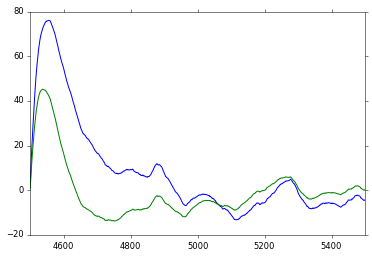

In [10]:
s3 = np.random.randn(10000) # 100 s
s3k1 = np.convolve(s3, k1, mode="valid")
s3k2 = np.convolve(s3, k2, mode="valid")

# NB: correlation is not commutative!
xc1 = np.correlate(s3k1, s3, mode="same")
xc2 = np.correlate(s3k2, s3, mode="same")
plt.plot(xc1)
plt.plot(xc2, hold=1)
# only look at lags near zero. 
# It's a little tricky to figure out where lag zero is - should be half the length of the shorter sequence
plt.xlim([s3k1.size / 2, s3k1.size / 2 + 1000])

What's the effect of the amount of data? Compare the results of the cross-correlation with the filters you used to generate the response. What does this suggest about the relationship between convolution and cross-correlation?

*The cross-correlation recovers the filters used to generate the response. However, limited data results in quite a bit of noise at longer time intervals.*

## Problem 2

**1.** Using the definition of the Fourier transform ($\tilde{h}(\omega) = \int_{-\infty}^\infty h(t) \exp(i \omega t) dt$), calculate the frequency response of $h_1(t)$ above. Do this analytically first, then verify that you get the same result from a fast Fourier transform.

**2.** Plot the magnitude and phase of $\tilde{h_1}(\omega)$ (in numpy, use `abs` and `angle`, respectively). Explain what the filter does to its input.

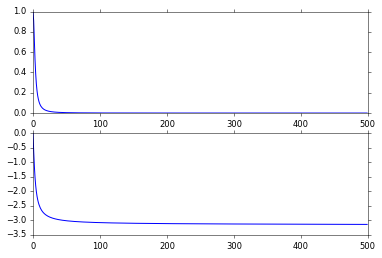

In [16]:
k1 = (t / tau_1**2) * np.exp(-t / tau_1)
K1 = np.fft.fft(k1)
nyq = k1.size / 2  # for real inputs, only use FFT outputs up to Nyquist

plt.subplot(211).plot(np.abs(K1[:nyq]))
plt.subplot(212).plot(np.angle(K1[:nyq]))

*The magnitude of the filter is zero everywhere except for a peak near zero Hz, so this filter will attenuate power in any frequency bands above about 30 Hz. The phase of the filter decreases to around -3.12 (i.e. pi). In the band where the magnitude is nonzero, the filter will shift the phase of any signals by -90 to -180 degrees. The negative sign means the filtered signal will lag the original signal*

**3.** Use the frequency response function to filter $s_1$, $s_2$, and $s_3$ in the frequency domain, then calculate the inverse Fourier transform to get back to the time domain.

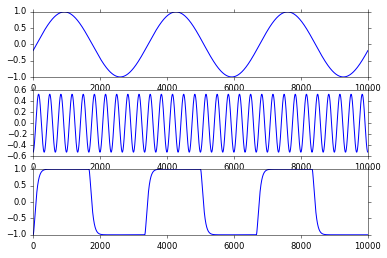

In [18]:
t2 = np.arange(0, 10000, 1)
s1 = np.sin(2 * np.pi * omega_1 / 1000 * t2) # note conversion of frequency to kHz to match ms
s2 = np.sin(2 * np.pi * omega_2 / 1000 * t2)
s3 = np.sign(s1)
S1 = np.fft.fft(s1)
# the filter needs to be padded to match the size of the signal
K1 = np.fft.fft(k1, n=s1.size)
S1 = np.fft.fft(s1)
S2 = np.fft.fft(s2)
S3 = np.fft.fft(s3)

s1k1 = np.fft.ifft(S1 * K1)
s2k1 = np.fft.ifft(S2 * K1)
s3k1 = np.fft.ifft(S3 * K1)
# use np.real to remove residual imaginary component
plt.subplot(311).plot(t2, np.real(s1k1))
plt.subplot(312).plot(t2, np.real(s2k1))
plt.subplot(313).plot(t2, np.real(s3k1))